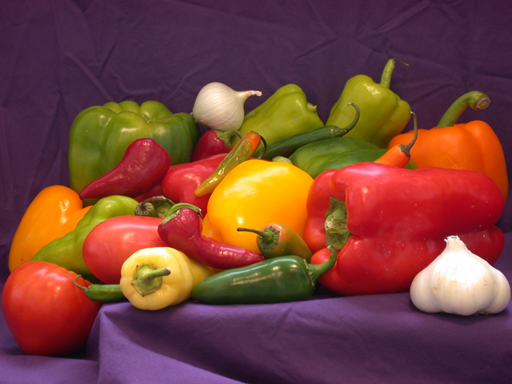

A cluster created with points  3387
Points clustered are  3387
[32, 42, 204]
A cluster created with points  10750
Points clustered are  14137
[72, 40, 74]
A cluster created with points  14664
Points clustered are  28801
[68, 39, 68]
A cluster created with points  817
Points clustered are  29618
[23, 93, 141]
A cluster created with points  12203
Points clustered are  41821
[63, 34, 65]
A cluster created with points  2936
Points clustered are  44757
[28, 25, 151]
A cluster created with points  5134
Points clustered are  49891
[69, 37, 69]
A cluster created with points  5811
Points clustered are  55702
[31, 22, 173]
A cluster created with points  3817
Points clustered are  59519
[24, 121, 119]
A cluster created with points  1100
Points clustered are  60619
[72, 125, 113]
A cluster created with points  8894
Points clustered are  69513
[68, 41, 70]
A cluster created with points  2228
Points clustered are  71741
[91, 55, 96]
A cluster created with points  1235
Points clustered are  72976
[13

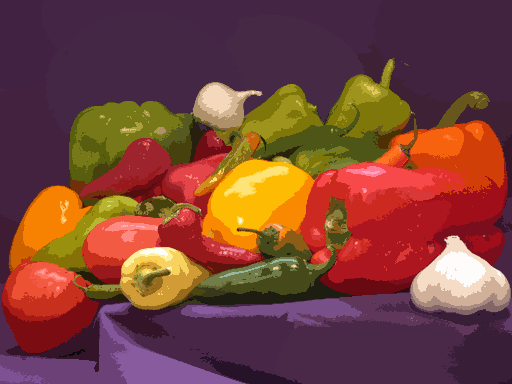

In [2]:
import numpy as np
import random;
from matplotlib import pyplot as plt
import random;
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
image = cv2.imread('peppers.png')
 
# print(image.format)
# print(image.size)
# print(image.mode)
# numpydata = np.asarray(image)
cv2_imshow(image)

# print(len(image))
# print(image.shape)
# print(image)

class MeanShift:
  def __init__(self, r):
    self.radius = r
    self.MeanDataSet = []
    self.CopyDataSet = []
  def createDataset(self):
    dataSet = cv2.imread('peppers.png')
    for i1 in range(dataSet.shape[0]):
      for i2 in range(dataSet.shape[1]):
        self.MeanDataSet.append([dataSet[i1][i2][0], dataSet[i1][i2][1], dataSet[i1][i2][2], i1, i2])
        self.CopyDataSet.append([dataSet[i1][i2][0], dataSet[i1][i2][1], dataSet[i1][i2][2], i1, i2])
  def normalizeDataSet(self):
    colMax = np.amax(self.MeanDataSet, axis = 0)
    # print(colMax)
    for i1 in range(len(self.MeanDataSet)):
      self.MeanDataSet[i1][0] =  self.MeanDataSet[i1][0]/colMax[0]
      self.MeanDataSet[i1][1] =  self.MeanDataSet[i1][1]/colMax[1]
      self.MeanDataSet[i1][2] =  self.MeanDataSet[i1][2]/colMax[2]
      self.MeanDataSet[i1][3] =  self.MeanDataSet[i1][3]/colMax[3]
      self.MeanDataSet[i1][4] =  self.MeanDataSet[i1][4]/colMax[4]
  def showDataSet(self):
    for i1 in range(5):
      print(self.CopyDataSet[i1], self.MeanDataSet[i1])
  def calculateDistance(self ,a, b):
    x0 = (a[0] -b[0])**2
    x1 = (a[1] -b[1])**2
    x2 = (a[2] -b[2])**2
    x3 = (a[3] -b[3])**2
    x4 = (a[4] -b[4])**2
    distance = (x0 + x1 + x2 + x3 + x4)**(0.5)
    return distance

  def meanShiftMehod(self):
    regeneratedData = np.arange(len(self.MeanDataSet)*3).reshape(384,512,3)
    clusterId = 0
    IndexData = list(range(0, len(self.MeanDataSet)))
    hashMap = [0]*len(self.MeanDataSet)
    total = 0
    while True:
      centeroid = self.MeanDataSet[random.choice(IndexData)]
      counter = 0
      for i1 in range(1000):
        cluster = []
        clusterPointIndexs = []
        counter = counter + 1
        for i2 in range(len(self.MeanDataSet)):
          NormPixel = self.MeanDataSet[i2]
          distance = self.calculateDistance(centeroid, NormPixel)
          if(hashMap[i2] == 0):
            if(distance < self.radius):
              cluster.append(NormPixel)
              clusterPointIndexs.append(i2)
        averageR = 0
        averageG = 0
        averageB = 0
        averageX = 0
        averageY = 0
        for pixel in cluster:
          averageR = averageR + pixel[0]
          averageG = averageG + pixel[1]
          averageB = averageB + pixel[2]
          averageX = averageX + pixel[3]
          averageY = averageY + pixel[4]
        averageR = averageR/(len(cluster))
        averageG = averageG/(len(cluster))
        averageB = averageB/(len(cluster))
        averageX = averageX/(len(cluster))
        averageY = averageY/(len(cluster))    
        newCenteroid = [averageR, averageG, averageB, averageX, averageY]
        if(self.calculateDistance(centeroid, newCenteroid) < 0.1):
          for i2 in clusterPointIndexs:
            hashMap[i2] = 1
            IndexData.remove(i2)
            regeneratedData[self.CopyDataSet[i2][3]][self.CopyDataSet[i2][4]] = [int(averageR*255), int(averageG*255), int(averageB*255)]
          print("A cluster created with points ", len(clusterPointIndexs))
          total = total + len(clusterPointIndexs)
          print("Points clustered are ", total)
          print([int(averageR*255), int(averageG*255), int(averageB*255)])
          cluster = []
          clusterPointIndexs = []
          break
        else:
          centeroid = newCenteroid
        if(counter == 999):
          for i2 in clusterPointIndexs:
            hashMap[i2] = 1
            IndexData.remove(i2)
            regeneratedData[self.CopyDataSet[i2][3]][self.CopyDataSet[i2][4]][0] = int(averageR*255)
            regeneratedData[self.CopyDataSet[i2][3]][self.CopyDataSet[i2][4]][1] = int(averageG*255)
            regeneratedData[self.CopyDataSet[i2][3]][self.CopyDataSet[i2][4]][2] = int(averageB*255)

          print("A cluster created with points ", len(clusterPointIndexs))
          total = total + len(clusterPointIndexs)
          print("Points clustered are ", total)
          break
      if(len(IndexData) == 0):
        print("Clustering completed ")
        # print(np.array(regeneratedData))
        # for j in range(384):
        #   print(regeneratedData[j])
        cv2_imshow(regeneratedData)
        break


m = MeanShift(0.2)
m.createDataset()
m.normalizeDataSet()
# m.showDataSet()
m.meanShiftMehod()




